# Исследования данных о продаже компьютерных игр

## Описание задачи

Для интернет-магазина компьютерных игр необходимо выявить определяющие успешность игры закономерности, которые позволят сделать ставку на потенциально популярный продукт и спланировать рекламные кампании в 2017 году. 

Анализ производится на основании исторических данных о продажах игр, оценки пользователей и экспертов, жанры и платформы (например, Xbox или PlayStation).

Описание столбцов таблицы:
- Name — название игры
- Platform — платформа
- Year_of_Release — год выпуска
- Genre — жанр игры
- NA_sales — продажи в Северной Америке (миллионы долларов)
- EU_sales — продажи в Европе (миллионы долларов)
- JP_sales — продажи в Японии (миллионы долларов)
- Other_sales — продажи в других странах (миллионы долларов)
- Critic_Score — оценка критиков (максимум 100)
- User_Score — оценка пользователей (максимум 10)
- Rating — рейтинг от организации ESRB (англ. Entertainment Software Rating Board). Эта ассоциация определяет рейтинг компьютерных игр и присваивает им подходящую возрастную категорию.

## План выполнения работы

- Шаг 1. Анализируемый файл и общая информация по нему
- Шаг 2. Подготовка данных
- Шаг 3. Исследовательский анализ данных
- Шаг 4. Портрет пользователя каждого региона
- Шаг 5. Проверка гипотез
- Шаг 6. Вывод

## Шаг 1. Анализируемый файл и общая информация по нему


In [1]:
# Импортируем необходимые библиотеки
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
from scipy import stats as st

In [2]:
# Ознакомимся с данными
games = pd.read_csv('/datasets/games.csv')
games

,Name,Platform,Year_of_Release,Genre,NA_sales,EU_sales,JP_sales,Other_sales,Critic_Score,User_Score,Rating
0,Wii Sports,Wii,2006.0,Sports,41.36,28.96,3.77,8.45,76.0,8,E
1,Super Mario Bros.,NES,1985.0,Platform,29.08,3.58,6.81,0.77,NaN,NaN,NaN
2,Mario Kart Wii,Wii,2008.0,Racing,15.68,12.76,3.79,3.29,82.0,8.3,E
3,Wii Sports Resort,Wii,2009.0,Sports,15.61,10.93,3.28,2.95,80.0,8,E
4,Pokemon Red/Pokemon Blue,GB,1996.0,Role-Playing,11.27,8.89,10.22,1.00,NaN,NaN,NaN
...,...,...,...,...,...,...,...,...,...,...,...
16710,Samurai Warriors: Sanada Maru,PS3,2016.0,Action,0.00,0.00,0.01,0.00,NaN,NaN,NaN
16711,LMA Manager 2007,X360,2006.0,Sports,0.00,0.01,0.00,0.00,NaN,NaN,NaN
16712,Haitaka no Psychedelica,PSV,2016.0,Adventure,0.00,0.00,0.01,0.00,NaN,NaN,NaN
16713,Spirits & Spells,GBA,2003.0,Platform,0.01,0.00,0.00,0.00,NaN,NaN,NaN


In [3]:
games.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 16715 entries, 0 to 16714
Data columns (total 11 columns):
Name               16713 non-null object
Platform           16715 non-null object
Year_of_Release    16446 non-null float64
Genre              16713 non-null object
NA_sales           16715 non-null float64
EU_sales           16715 non-null float64
JP_sales           16715 non-null float64
Other_sales        16715 non-null float64
Critic_Score       8137 non-null float64
User_Score         10014 non-null object
Rating             9949 non-null object
dtypes: float64(6), object(5)
memory usage: 1.4+ MB


### Промежуточный вывод

В нашем распоряжении датасет размером 16715х11. Пропуски обнаружены в столбцах Name, Year_of_Release, Genre, Critic_Score, User_Score, Rating. Пропуски в оценочных столбцах скорее всего связаны с тем, что не все игры подвергались оценке, их можно заполнить нулевыми значениями, однако это может изказить результаты статистического анализа, поэтому оставим данные столбцы без изменений.

## Шаг 2. Подготовка данных

In [4]:
# Приведем названия столбцов к нижнему регистру
games.set_axis(['name','platform','year_of_release', 'genre', \
                'na_sales', 'eu_sales', 'jp_sales', 'other_sales', 
                'critic_score', 'user_score', 'rating'],axis = 'columns',inplace = True)
games

,name,platform,year_of_release,genre,na_sales,eu_sales,jp_sales,other_sales,critic_score,user_score,rating
0,Wii Sports,Wii,2006.0,Sports,41.36,28.96,3.77,8.45,76.0,8,E
1,Super Mario Bros.,NES,1985.0,Platform,29.08,3.58,6.81,0.77,NaN,NaN,NaN
2,Mario Kart Wii,Wii,2008.0,Racing,15.68,12.76,3.79,3.29,82.0,8.3,E
3,Wii Sports Resort,Wii,2009.0,Sports,15.61,10.93,3.28,2.95,80.0,8,E
4,Pokemon Red/Pokemon Blue,GB,1996.0,Role-Playing,11.27,8.89,10.22,1.00,NaN,NaN,NaN
...,...,...,...,...,...,...,...,...,...,...,...
16710,Samurai Warriors: Sanada Maru,PS3,2016.0,Action,0.00,0.00,0.01,0.00,NaN,NaN,NaN
16711,LMA Manager 2007,X360,2006.0,Sports,0.00,0.01,0.00,0.00,NaN,NaN,NaN
16712,Haitaka no Psychedelica,PSV,2016.0,Adventure,0.00,0.00,0.01,0.00,NaN,NaN,NaN
16713,Spirits & Spells,GBA,2003.0,Platform,0.01,0.00,0.00,0.00,NaN,NaN,NaN


In [5]:
# Проверяем датасет на наличи дубликатов
games.duplicated().sum()

0

In [6]:
# В столбцах name и genre по два прупущенных значения, скорее всего они имеют одинаковую природу, убедимся:
games[games['name'].isna() == True]

,name,platform,year_of_release,genre,na_sales,eu_sales,jp_sales,other_sales,critic_score,user_score,rating
659,NaN,GEN,1993.0,NaN,1.78,0.53,0.00,0.08,NaN,NaN,NaN
14244,NaN,GEN,1993.0,NaN,0.00,0.00,0.03,0.00,NaN,NaN,NaN


In [7]:
# Наша гипотеза подтвердилась, данные строчки неинформативны, можем их удалить
# Также удаляем пропуски с годом выпуска игры
games.dropna(subset = ['name', 'genre', 'year_of_release'], inplace = True)

In [8]:
# В столбце user_score обнаружено большое кол-во значений 'tbd'
games['user_score'].value_counts()

tbd    2376
7.8     322
8       285
8.2     276
8.3     252
       ... 
0.2       2
1.5       2
0.9       2
0         1
9.7       1
Name: user_score, Length: 96, dtype: int64

In [9]:
# Меняем значение 'tbd' в столбце user_score на NaN
games.loc[games['user_score'] == 'tbd', 'user_score'] = float('nan')
games.user_score.value_counts()

7.8    322
8      285
8.2    276
8.3    252
7.5    249
      ... 
1.3      2
1        2
0.9      2
9.7      1
0        1
Name: user_score, Length: 95, dtype: int64

In [10]:
# Приведем user_score в формат float
games['user_score'] = games['user_score'].astype('float')

In [11]:
# Приведем год релиза в формат int
games['year_of_release'] = pd.to_datetime(games['year_of_release'], format='%Y')
games['year_of_release'] = pd.DatetimeIndex(games['year_of_release']).year

In [12]:
games.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 16444 entries, 0 to 16714
Data columns (total 11 columns):
name               16444 non-null object
platform           16444 non-null object
year_of_release    16444 non-null int64
genre              16444 non-null object
na_sales           16444 non-null float64
eu_sales           16444 non-null float64
jp_sales           16444 non-null float64
other_sales        16444 non-null float64
critic_score       7983 non-null float64
user_score         7463 non-null float64
rating             9768 non-null object
dtypes: float64(6), int64(1), object(4)
memory usage: 1.5+ MB


In [13]:
# Посчитаем суммарные продажи во всех регионах по каждой игре
games['all_sales'] = games['na_sales'] + games['eu_sales'] + games['jp_sales']
games.pivot_table(index='name', values='all_sales', aggfunc='sum').sort_values(by='all_sales', ascending=False)

,all_sales
name,
Wii Sports,74.09
Grand Theft Auto V,48.68
Super Mario Bros.,44.32
Tetris,35.15
Mario Kart Wii,32.23
...,...
The Cheetah Girls,0.01
"Horse Life 4: My Horse, My Friend, My Champion",0.01
Hoshigami: Ruining Blue Earth Remix,0.01


### Промежуточный вывод

Мы привели названия столбцов к нижнему регистру удалили пропуски в столбцах 'name', 'genre', 'year_of_release', привели значения столбца года выпуска к формату int, а также привели к формату float и избавились от некорректных значений в столбце 'user_score'. Заполнять пропуски в столбцах critic_score, user_score и rating считаю нецелесообразным.  Также мы почитали суммарные продажи во всех регионах по каждой игре. В тройку самый продаваемых игр вошли Wii Sports, Grand Theft Auto V и Super Mario Bros.

## Шаг 3. Исследовательский анализ данных

In [14]:
games

,name,platform,year_of_release,genre,na_sales,eu_sales,jp_sales,other_sales,critic_score,user_score,rating,all_sales
0,Wii Sports,Wii,2006,Sports,41.36,28.96,3.77,8.45,76.0,8.0,E,74.09
1,Super Mario Bros.,NES,1985,Platform,29.08,3.58,6.81,0.77,NaN,NaN,NaN,39.47
2,Mario Kart Wii,Wii,2008,Racing,15.68,12.76,3.79,3.29,82.0,8.3,E,32.23
3,Wii Sports Resort,Wii,2009,Sports,15.61,10.93,3.28,2.95,80.0,8.0,E,29.82
4,Pokemon Red/Pokemon Blue,GB,1996,Role-Playing,11.27,8.89,10.22,1.00,NaN,NaN,NaN,30.38
...,...,...,...,...,...,...,...,...,...,...,...,...
16710,Samurai Warriors: Sanada Maru,PS3,2016,Action,0.00,0.00,0.01,0.00,NaN,NaN,NaN,0.01
16711,LMA Manager 2007,X360,2006,Sports,0.00,0.01,0.00,0.00,NaN,NaN,NaN,0.01
16712,Haitaka no Psychedelica,PSV,2016,Adventure,0.00,0.00,0.01,0.00,NaN,NaN,NaN,0.01
16713,Spirits & Spells,GBA,2003,Platform,0.01,0.00,0.00,0.00,NaN,NaN,NaN,0.01


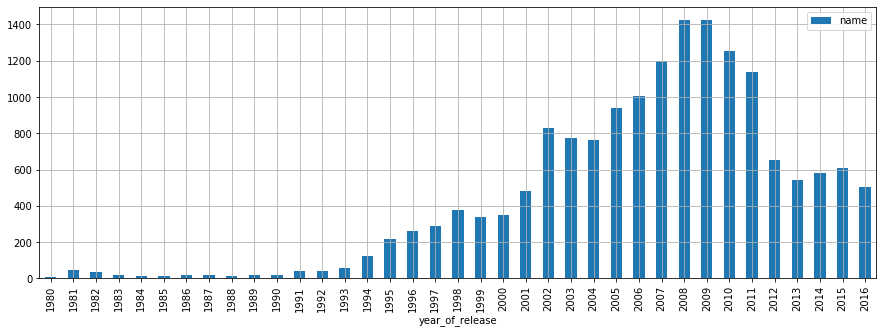

In [15]:
# Посмотрим сколько игр выпускалось в каждый год
games_years = games.pivot_table(index='year_of_release', values='name', aggfunc='count') \
                  .sort_values(by='year_of_release')
games_years.plot(kind = 'bar', grid=True, figsize=(15, 5), legend=True)
plt.show()

### Промежуточный вывод

Можно сказать, что реальный спрос на игры появился с 1994 года.

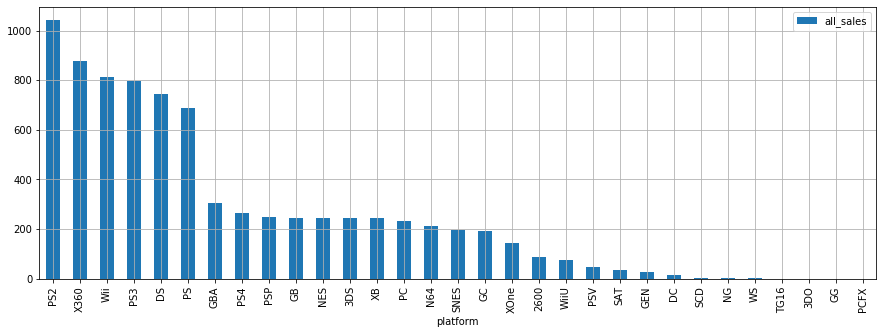

In [16]:
# Посмотрим на платформы с наибольшими продажами 
platforms_sales = games.pivot_table(index=['platform'], values='all_sales', aggfunc='sum') \
                                    .sort_values(by='all_sales', ascending=False)
platforms_sales.plot(kind = 'bar', grid=True, figsize=(15, 5))
plt.show()

### Промежуточный вывод

Выберем наиболее популярные платформы, cуммарные продажи которых более 600 млн $

In [17]:
# Сделаем срез для определения наиболее востребованых платформ
top_platforms = platforms_sales[platforms_sales['all_sales'] > 600]
top_platforms

,all_sales
platform,
PS2,1043.09
X360,876.36
Wii,813.47
PS3,796.75
DS,743.74
PS,686.89


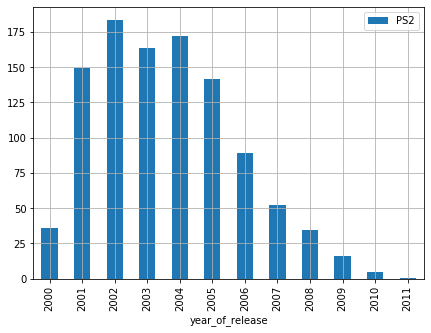

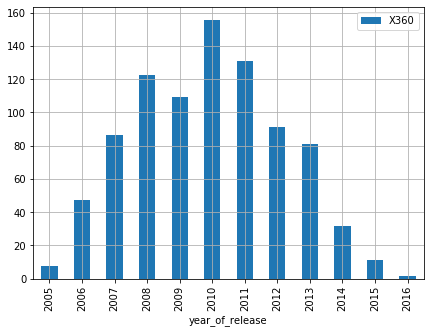

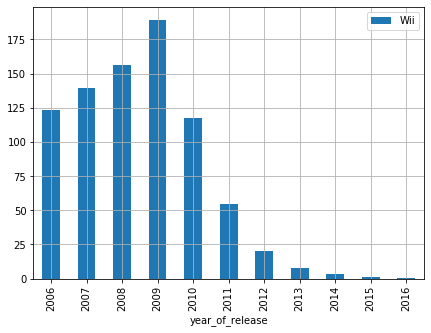

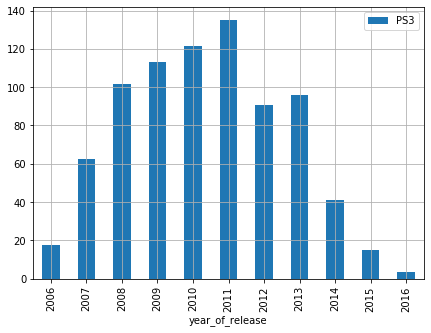

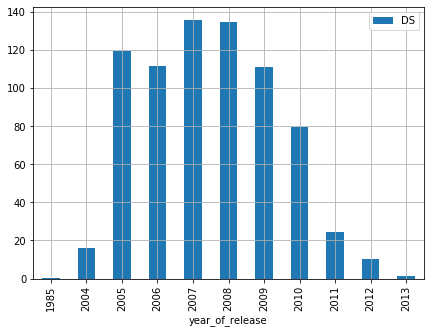

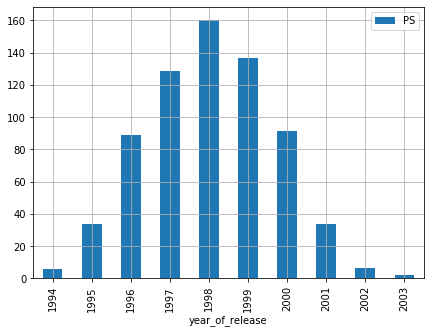

In [18]:
# Построим графики продаж популярных платформ 
for row in top_platforms.index:
    games[games['platform'] == row].\
                                      pivot_table(index='year_of_release', values='all_sales', aggfunc='sum').\
                                      plot(kind = 'bar', grid=True, figsize=(7, 5))
    plt.legend([row])
    plt.show()

### Промежуточный вывод

Исходя из графиков можно сказать, что платформа жива, если продажи игр по ней превышают 100 млн $

In [19]:
# Зададим пороговый уровень значительных продаж на уровне 100 млн $ в год и посчитаем кол-во лет продаж выше этого значения
top_games = games.pivot_table(index=['platform', 'year_of_release'], values='all_sales', aggfunc='sum').query('all_sales > 100')
top_games

all_sales
platform year_of_release           
DS       2005                119.34
         2006                111.64
         2007                135.85
         2008                134.37
         2009                110.99
PS       1997                128.30
         1998                160.44
         1999                136.61
PS2      2001                149.65
         2002                183.66
         2003                163.62
         2004                171.96
         2005                141.51
PS3      2008                101.78
         2009                113.08
         2010                121.36
         2011                135.22
PS4      2015                100.44
Wii      2006                123.63
         2007                139.22
         2008                156.33
         2009                189.43
         2010                117.73
X360     2008                122.56
         2009                109.26
         2010                155.80
         2011                131.11

In [20]:
top_games.index

MultiIndex([(  'DS', 2005),
            (  'DS', 2006),
            (  'DS', 2007),
            (  'DS', 2008),
            (  'DS', 2009),
            (  'PS', 1997),
            (  'PS', 1998),
            (  'PS', 1999),
            ( 'PS2', 2001),
            ( 'PS2', 2002),
            ( 'PS2', 2003),
            ( 'PS2', 2004),
            ( 'PS2', 2005),
            ( 'PS3', 2008),
            ( 'PS3', 2009),
            ( 'PS3', 2010),
            ( 'PS3', 2011),
            ( 'PS4', 2015),
            ( 'Wii', 2006),
            ( 'Wii', 2007),
            ( 'Wii', 2008),
            ( 'Wii', 2009),
            ( 'Wii', 2010),
            ('X360', 2008),
            ('X360', 2009),
            ('X360', 2010),
            ('X360', 2011)],
           names=['platform', 'year_of_release'])

### Промежуточный вывод

Примем актуальный период жизни платформы - 5 лет. Соответственно в дальнейшем мы будем анализировать промежуток с 2012 по 2016 год включительно.

In [21]:
# Сделаем срез с 2012 по 2016 год включительно
games_relevant = games.query('year_of_release > 2011').reset_index(drop = True)
games_relevant

,name,platform,year_of_release,genre,na_sales,eu_sales,jp_sales,other_sales,critic_score,user_score,rating,all_sales
0,Grand Theft Auto V,PS3,2013,Action,7.02,9.09,0.98,3.96,97.0,8.2,M,17.09
1,Grand Theft Auto V,X360,2013,Action,9.66,5.14,0.06,1.41,97.0,8.1,M,14.86
2,Call of Duty: Black Ops 3,PS4,2015,Shooter,6.03,5.86,0.36,2.38,NaN,NaN,NaN,12.25
3,Pokemon X/Pokemon Y,3DS,2013,Role-Playing,5.28,4.19,4.35,0.78,NaN,NaN,NaN,13.82
4,Call of Duty: Black Ops II,PS3,2012,Shooter,4.99,5.73,0.65,2.42,83.0,5.3,M,11.37
...,...,...,...,...,...,...,...,...,...,...,...,...
2881,Strawberry Nauts,PSV,2016,Adventure,0.00,0.00,0.01,0.00,NaN,NaN,NaN,0.01
2882,Aiyoku no Eustia,PSV,2014,Misc,0.00,0.00,0.01,0.00,NaN,NaN,NaN,0.01
2883,Samurai Warriors: Sanada Maru,PS3,2016,Action,0.00,0.00,0.01,0.00,NaN,NaN,NaN,0.01
2884,Haitaka no Psychedelica,PSV,2016,Adventure,0.00,0.00,0.01,0.00,NaN,NaN,NaN,0.01


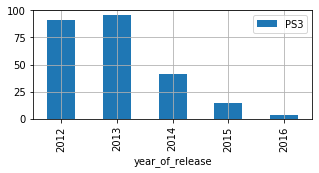

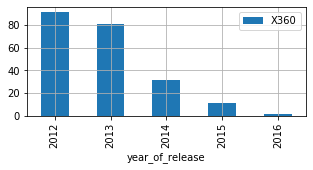

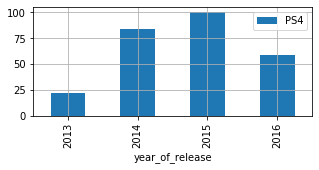

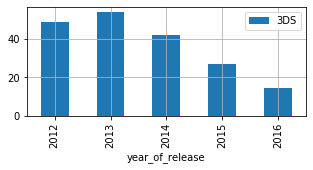

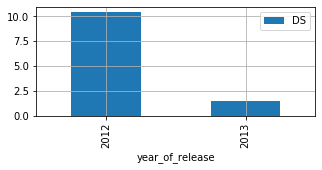

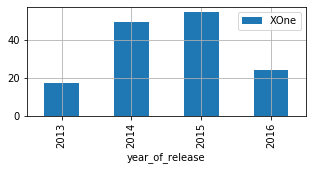

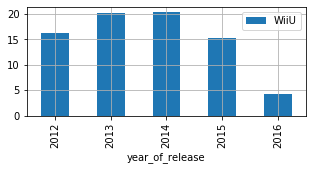

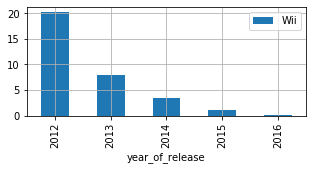

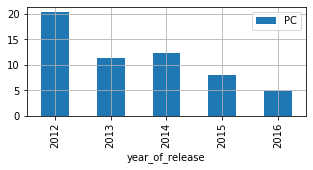

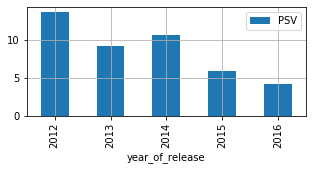

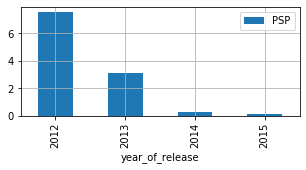

In [22]:
# Исследуем динамику продаж по платформам в рамках выделенного периода
for row in games_relevant.platform.unique():
    games_relevant[games_relevant['platform'] == row].\
                                      pivot_table(index='year_of_release', values='all_sales', aggfunc='sum').\
                                      plot(kind = 'bar', grid=True, figsize=(5, 2))
    plt.legend([row])
    plt.show()

### Премежуточный вывод

Как перспективные платформы можно выделить PS4 и XOne, у остальных платформ отрицательная динамика продаж с 2012 по 2016 год

In [23]:
# Сделаем срез данный по платформам PS4 и XOne
games_relevant_platform = games_relevant.query('platform == "XOne" or platform == "PS4"')
games_relevant_platform

,name,platform,year_of_release,genre,na_sales,eu_sales,jp_sales,other_sales,critic_score,user_score,rating,all_sales
2,Call of Duty: Black Ops 3,PS4,2015,Shooter,6.03,5.86,0.36,2.38,NaN,NaN,NaN,12.25
6,Grand Theft Auto V,PS4,2014,Action,3.96,6.31,0.38,1.97,97.0,8.3,M,10.65
14,FIFA 16,PS4,2015,Sports,1.12,6.12,0.06,1.28,82.0,4.3,E,7.30
17,Star Wars Battlefront (2015),PS4,2015,Shooter,2.99,3.49,0.22,1.28,NaN,NaN,NaN,6.70
18,Call of Duty: Advanced Warfare,PS4,2014,Shooter,2.81,3.48,0.14,1.23,83.0,5.7,M,6.43
...,...,...,...,...,...,...,...,...,...,...,...,...
2854,Sébastien Loeb Rally Evo,XOne,2016,Racing,0.00,0.01,0.00,0.00,63.0,8.2,E,0.01
2858,Rugby Challenge 3,XOne,2016,Sports,0.00,0.01,0.00,0.00,NaN,6.6,E,0.01
2860,ZombiU,XOne,2016,Action,0.00,0.01,0.00,0.00,NaN,NaN,NaN,0.01
2867,Prison Architect,XOne,2016,Action,0.01,0.00,0.00,0.00,74.0,6.7,NaN,0.01


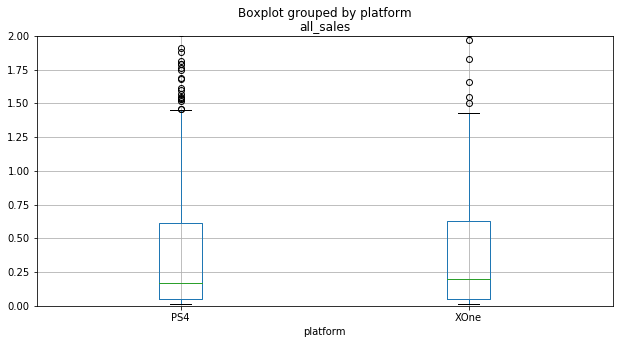

In [24]:
# Построим график «ящик с усами» по глобальным продажам каждой игры и разбивкой по платформам
games_relevant_platform.boxplot(column='all_sales', by='platform', figsize=(10, 5))
plt.ylim(0, 2)
plt.show()

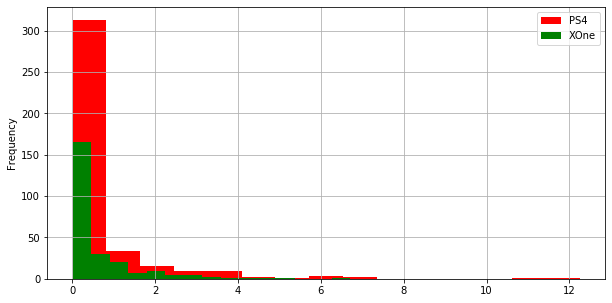

In [25]:
# Построим гистограммы
games_relevant_platform_PS4 = games_relevant_platform.query('platform == "PS4"')
games_relevant_platform_XOne = games_relevant_platform.query('platform == "XOne"')

ax = games_relevant_platform_PS4.plot(y='all_sales', kind='hist', bins=15, label='PS4', color='r', grid=True, figsize=(10, 5))
games_relevant_platform_XOne.plot(y='all_sales', kind='hist', bins=15, label='XOne', grid=True, color='g', ax=ax)
plt.show()


### Промежуточный вывод

По разбросу значений обе платформы практически идентичны, среднее значение и медиана у них практически совпадают.

In [26]:
# Столбцы с оценками
games_relevant_platform_XOne[['critic_score', 'user_score', 'all_sales']]

,critic_score,user_score,all_sales
21,NaN,NaN,6.71
31,97.0,7.9,5.00
34,81.0,5.4,4.78
44,84.0,6.4,4.08
53,88.0,6.2,3.84
...,...,...,...
2854,63.0,8.2,0.01
2858,NaN,6.6,0.01
2860,NaN,NaN,0.01
2867,74.0,6.7,0.01


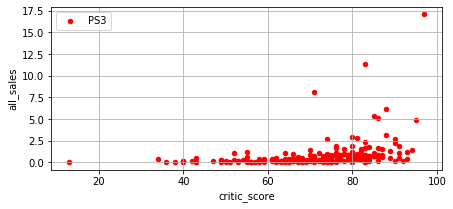

Корреляция по платформе PS3 : 
0.3344386790132552


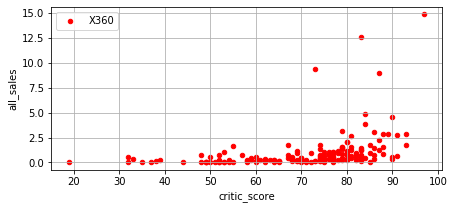

Корреляция по платформе X360 : 
0.36025976902915396


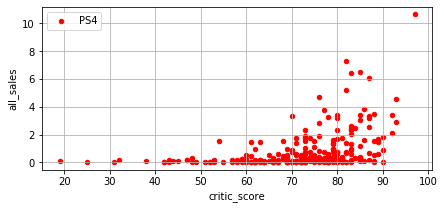

Корреляция по платформе PS4 : 
0.40588677465201267


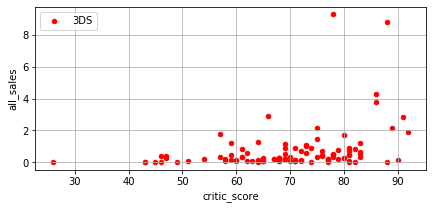

Корреляция по платформе 3DS : 
0.3208044063113413


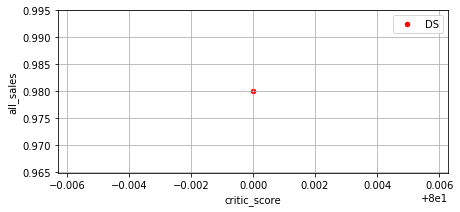

Корреляция по платформе DS : 
nan


/opt/conda/lib/python3.7/site-packages/numpy/lib/function_base.py:2526: RuntimeWarning: Degrees of freedom <= 0 for slice
  c = cov(x, y, rowvar)
/opt/conda/lib/python3.7/site-packages/numpy/lib/function_base.py:2455: RuntimeWarning: divide by zero encountered in true_divide
  c *= np.true_divide(1, fact)


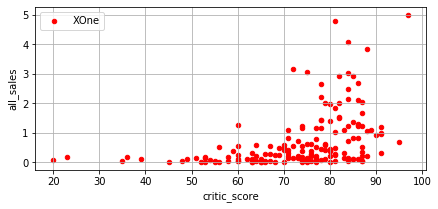

Корреляция по платформе XOne : 
0.41720638309101765


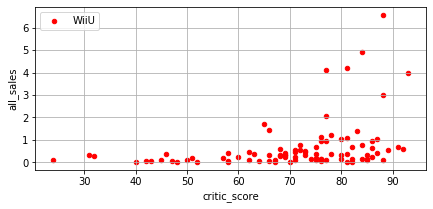

Корреляция по платформе WiiU : 
0.34706169744855475


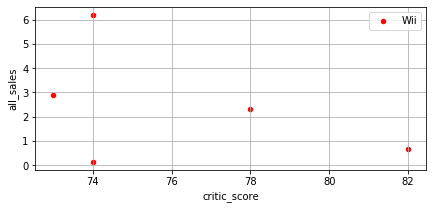

Корреляция по платформе Wii : 
-0.4229985071870359


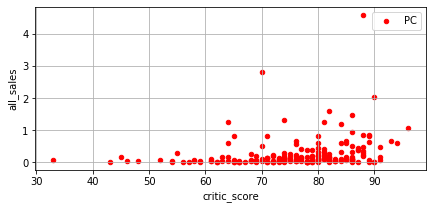

Корреляция по платформе PC : 
0.23752286170616807


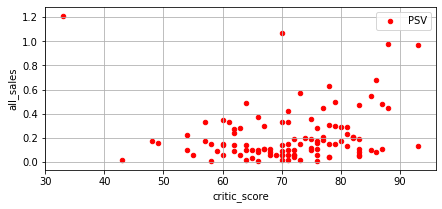

Корреляция по платформе PSV : 
0.10373713502246376


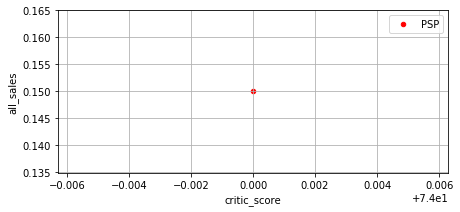

Корреляция по платформе PSP : 
nan


In [27]:
# Посмотрим, как влияют на продажи отзывы пользователей и критиков

# Построим диаграмму рассеяния, чтобы соотнести суммарные продажи и оценку критиков, а также посчитаем корреляцию
for row in games_relevant.platform.unique():
    
    data = games_relevant[games_relevant['platform'] == row]
    data.plot(x='critic_score', y='all_sales', kind='scatter',\
            grid=True, figsize=(7, 3), label='row', color='r')
    
    plt.legend([row])
    plt.show()
    print('Корреляция по платформе', row, ': ')
    print(data['all_sales'].corr(data['critic_score']))

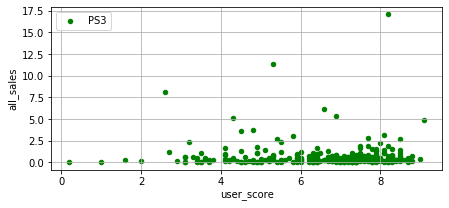

Корреляция по платформе PS3 : 
-0.005342286769455875


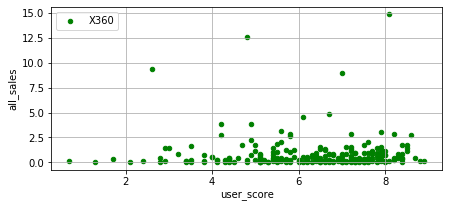

Корреляция по платформе X360 : 
0.006562723093225382


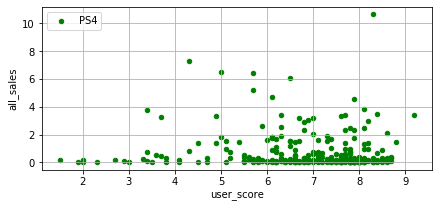

Корреляция по платформе PS4 : 
-0.03126053686666918


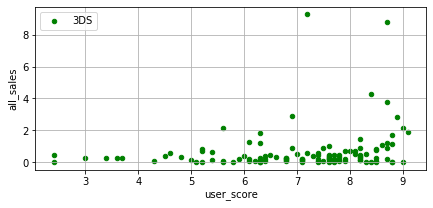

Корреляция по платформе 3DS : 
0.19923860021422587


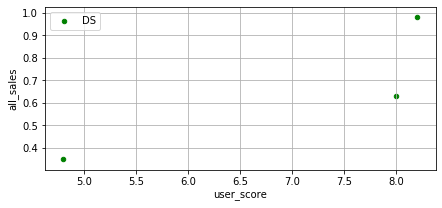

Корреляция по платформе DS : 
0.8601550387496213


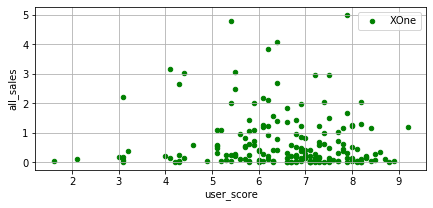

Корреляция по платформе XOne : 
-0.06880394425598693


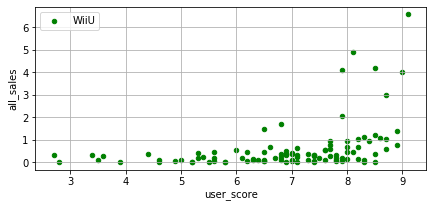

Корреляция по платформе WiiU : 
0.3992109927499889


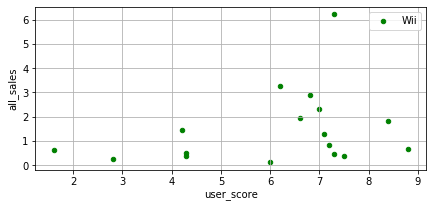

Корреляция по платформе Wii : 
0.2999488746803372


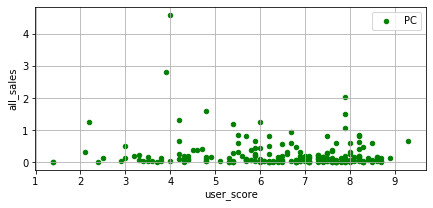

Корреляция по платформе PC : 
-0.12306015475869903


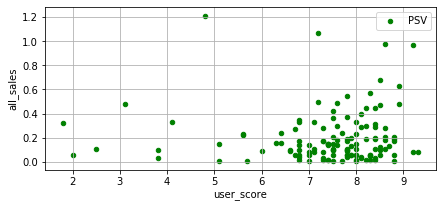

Корреляция по платформе PSV : 
0.018353729170581732


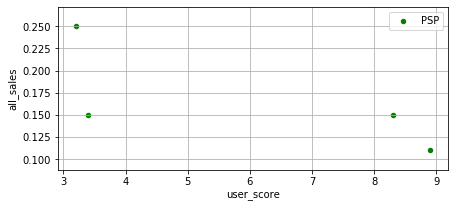

Корреляция по платформе PSP : 
-0.7143058185748776


In [28]:
# Сделаем тоже самое только с оценками пользователей
for row in games_relevant.platform.unique():
    
    data = games_relevant[games_relevant['platform'] == row]
    data.plot(x='user_score', y='all_sales', kind='scatter',\
            grid=True, figsize=(7, 3), label='row', color='g')
    
    plt.legend([row])
    plt.show()
    print('Корреляция по платформе', row, ': ')
    print(data['all_sales'].corr(data['user_score']))

In [29]:
games_relevant_platform[['user_score','critic_score','all_sales']].corr().style.background_gradient(cmap='coolwarm')

,user_score,critic_score,all_sales
user_score,1,0.517664,-0.0379561
critic_score,0.517664,1,0.398537
all_sales,-0.0379561,0.398537,1


### Промежуточный вывод

У продаж по платформам PS4 и XOne наблюдается пусть и не сильная, но положительная корреляция с оценкой критиков, как и у большинства других платформ. Оценка ползователей практически никак не коррелирует с продажами как по платформам PS4 и XOne, так и по остальным платформам.

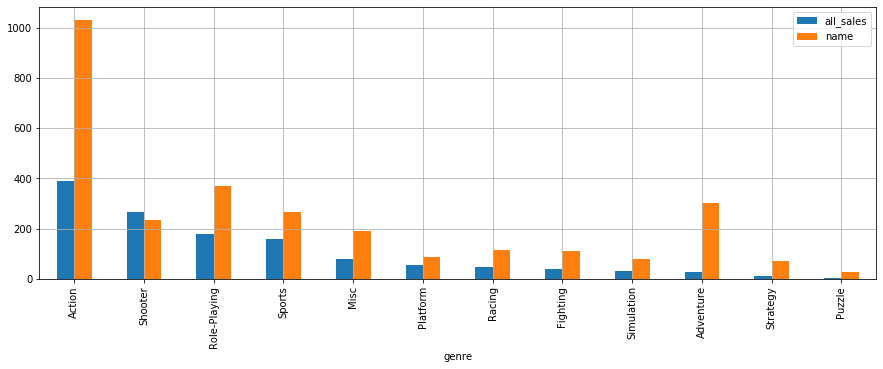

,all_sales,name
genre,,
Action,389.98,1031
Shooter,267.47,235
Role-Playing,177.97,370
Sports,158.63,268
Misc,77.37,192
Platform,55.42,85
Racing,47.01,115
Fighting,40.02,109
Simulation,32.93,80


In [30]:
# Посмотрим на общее распределение игр по жанрам
games_relevant_genre = games_relevant.pivot_table(index='genre', aggfunc={'name':'count', 'all_sales':'sum'})\
                       .sort_values(by='all_sales', ascending=False)
games_relevant_genre.plot(kind = 'bar', grid=True, figsize=(15, 5), legend=True)
plt.show()
games_relevant_genre

### Промежуточный вывод

Наиболее прибыльные игры в жанре Action, Shooter, Role-Plaing, наименее прибыльные жанры Adventure, Strategy и Puzzle. По кол-ву игр также впереди жанр Action, далее Role-Plaing и Adventure, менее всего игр в жанре Simulation, Strategy и Puzzle. Интересно, что достаточно большое кол-во игр в жанре Adventure приносит относительно небольшую прибыль.

## Шаг 4. Портрет пользователя каждого региона

In [31]:
games_relevant

,name,platform,year_of_release,genre,na_sales,eu_sales,jp_sales,other_sales,critic_score,user_score,rating,all_sales
0,Grand Theft Auto V,PS3,2013,Action,7.02,9.09,0.98,3.96,97.0,8.2,M,17.09
1,Grand Theft Auto V,X360,2013,Action,9.66,5.14,0.06,1.41,97.0,8.1,M,14.86
2,Call of Duty: Black Ops 3,PS4,2015,Shooter,6.03,5.86,0.36,2.38,NaN,NaN,NaN,12.25
3,Pokemon X/Pokemon Y,3DS,2013,Role-Playing,5.28,4.19,4.35,0.78,NaN,NaN,NaN,13.82
4,Call of Duty: Black Ops II,PS3,2012,Shooter,4.99,5.73,0.65,2.42,83.0,5.3,M,11.37
...,...,...,...,...,...,...,...,...,...,...,...,...
2881,Strawberry Nauts,PSV,2016,Adventure,0.00,0.00,0.01,0.00,NaN,NaN,NaN,0.01
2882,Aiyoku no Eustia,PSV,2014,Misc,0.00,0.00,0.01,0.00,NaN,NaN,NaN,0.01
2883,Samurai Warriors: Sanada Maru,PS3,2016,Action,0.00,0.00,0.01,0.00,NaN,NaN,NaN,0.01
2884,Haitaka no Psychedelica,PSV,2016,Adventure,0.00,0.00,0.01,0.00,NaN,NaN,NaN,0.01


In [32]:
# Топ 5 популярных платформ в Северной Америке
games_relevant.pivot_table(index='platform', values='na_sales', aggfunc='sum')\
              .sort_values(by='na_sales', ascending=False).head(5)

,na_sales
platform,
X360,140.05
PS4,108.74
PS3,103.38
XOne,93.12
3DS,55.31


In [33]:
# Топ 5 популярных платформ в Европе
games_relevant.pivot_table(index='platform', values='eu_sales', aggfunc='sum')\
              .sort_values(by='eu_sales', ascending=False).head(5)

,eu_sales
platform,
PS4,141.09
PS3,106.86
X360,74.52
XOne,51.59
3DS,42.64


In [34]:
# Топ 5 популярных платформ в Японии
games_relevant.pivot_table(index='platform', values='jp_sales', aggfunc='sum')\
              .sort_values(by='jp_sales', ascending=False).head(5)

,jp_sales
platform,
3DS,87.79
PS3,35.29
PSV,21.04
PS4,15.96
WiiU,13.01


### Промежуточный вывод

Рынки Северной Америки и Европы примерно сопоставимы по объему. Первое место на них занимают X360 и PS4 примерно с одинаковыми продажами и одинаковым отрывом от 2го места. На рынке Японии беззаговорочным лидером является платформа 3DS, PS4 там только на 4 месте, а X360 нет даже и в пятерке.

In [35]:
# Топ 5 популярных жанров в Северной Америке
games_relevant.pivot_table(index='genre', values='na_sales', aggfunc='sum')\
              .sort_values(by='na_sales', ascending=False).head(5)

,na_sales
genre,
Action,177.84
Shooter,144.77
Sports,81.53
Role-Playing,64.00
Misc,38.19


In [36]:
# Топ 5 популярных жанров в Европе
games_relevant.pivot_table(index='genre', values='eu_sales', aggfunc='sum')\
              .sort_values(by='eu_sales', ascending=False).head(5)

,eu_sales
genre,
Action,159.34
Shooter,113.47
Sports,69.09
Role-Playing,48.53
Racing,27.29


In [37]:
# Топ 5 популярных жанров в Японии
games_relevant.pivot_table(index='genre', values='jp_sales', aggfunc='sum')\
              .sort_values(by='jp_sales', ascending=False).head(5)

,jp_sales
genre,
Role-Playing,65.44
Action,52.80
Misc,12.86
Simulation,10.41
Fighting,9.44


### Промежуточный вывод

Предпочтения по жанрам в Северной Америке и Европе практически не отличаются - Action, Shooter, Sports, Role-Playing. Однако в Японии набор популярных жанров отличается - лидирует жанр Role-Playing и Action, а Shooter и Sports нет даже в пятерке.

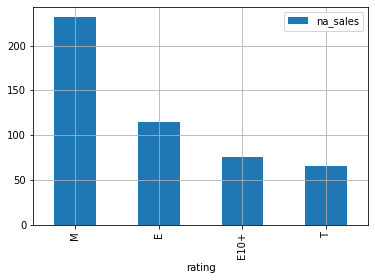

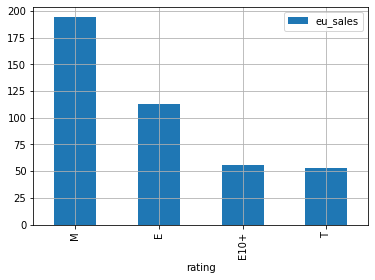

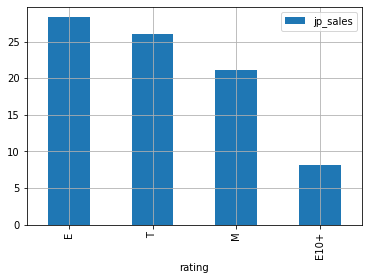

In [38]:
# Посмотрим, влияет ли рейтинг ESRB на продажи в отдельном регионе
region = ['na_sales', 'eu_sales', 'jp_sales']
for row in region:
    games_relevant.pivot_table(index='rating', values=row, aggfunc='sum')\
                  .sort_values(by=row, ascending=False)\
                  .plot(kind='bar', grid=True)
    plt.show()

### Промежуточный вывод

Из графиков можно сделать вывод, что рейтинг ESRB оказывает меньшее влияние на продажи в Японии, нежели в Северной Америке и Европе.

## Шаг 5. Проверка гипотез

In [39]:
# Для проверки гипотез удаляем значения NaN из столбца user_score
games_relevant.dropna(subset = ['user_score'], inplace = True)

In [40]:
# Проверим гипотезу, что средние пользовательские рейтинги платформ Xbox One и PC одинаковые

# Нулевая гипотеза: средние пользовательские рейтинги платформ Xbox One и PC равны
# Альтернативная гипотеза: средние пользовательские рейтинги платформ Xbox One и PC не равны
alpha = .05
results = st.ttest_ind(games_relevant.query('platform == "XOne"')['user_score'],\
                       games_relevant.query('platform == "PC"')['user_score'], equal_var = True)
print('p-значение:', results.pvalue) 
if (results.pvalue < alpha):
    print("Отвергаем нулевую гипотезу")
else:
    print("Не получилось отвергнуть нулевую гипотезу")

p-значение: 0.5535080500643661
Не получилось отвергнуть нулевую гипотезу


In [41]:
# Проверим гипотезу, что средние пользовательские рейтинги жанров Action (англ. «действие»)
# и Sports (англ. «виды спорта») разные

# Нулевая гипотеза: средние пользовательские рейтинги жанров Action (англ. «действие»)
# и Sports (англ. «виды спорта») равны
# Альтернативная гипотеза: средние пользовательские рейтинги жанров Action (англ. «действие»)
# и Sports (англ. «виды спорта») разные не равны
alpha = .05
results = st.ttest_ind(games_relevant.query('genre == "Action"')['user_score'],\
                       games_relevant.query('genre == "Sports"')['user_score'], equal_var = True)
print('p-значение:', results.pvalue) 
if (results.pvalue < alpha):
    print("Отвергаем нулевую гипотезу")
else:
    print("Не получилось отвергнуть нулевую гипотезу")

p-значение: 3.7163089460934874e-26
Отвергаем нулевую гипотезу


### Промежуточный вывод

Распределения выбранных выборок нормальные, поэтому мы можем использовать t-test для проверки среднего генеральной совокупности. Так как мы не смогли отвергнуть нулевую гипотезу о равенстве средних пользовательских рейтингов платформ Xbox One и PC, то можно утверждать, что различия между средними значеними пользовательских рейтингов данных платформ с вероятностью 55% можно получить случайно.
Так как мы смогли отвергнуть нулевую гипотезу о равенстве средних пользовательские рейтингов жанров Action и Sports, то можно утверждать, что пользовательские рейтинги по данным жанрам в генеральной совокупности разные. 

## Шаг 6. Вывод

В работе рассматривалась информация о исторических данных о продажах игр, оценки пользователей и экспертов, жанры и платформы (например, Xbox или PlayStation). Таблица состояла из 16715 строк и 11 столбцов. Пропуски были обнаружены в столбцах Name, Year_of_Release, Genre, Critic_Score, User_Score, Rating. После предобработки данных в датасете осталось 16444 строк.

В процессе иледовательского анализа мы выяснили, что реальный спрос на игры появился 1994 г., самые популярные платформы за всю историю - PS2, X360, Wii, PS3, DS, PS, приблизительный срок жизни платформы - около 5 лет, перпективными платформами можно читать PS4 и ХOne, отзывы критиков влияют на продажи игр, а отзывы пользователей нет, самые прибыльные жанры - Action, Shooter и Role-Playing.

Также мы составили портреты пользователей по регионам:
- Северная Америка: предпочитает X360, играет в Action и Shooter;
- Европа: предпочитает PS4, играет в Action и Shooter;
- Япония: предпочитает 3DS, играет в Role-Playing и Action.

Гипотезу о равенстве среднего пользовательского рейтинга по платформам Xbox One и PC опровергнуть не удалось. Гипотезу о различии в среднем пользовательских рейтингов жанров Action и Sports удалось подтвердить.
